                                    TITANIC DATASETS ANALYSIS

In [1]:
# Import libraries

import pandas as pd
import numpy as np

# Load train and test datasets

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


In [2]:
# Preview the train dataset
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Preview test dataset
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Comments: 
Base on the preview, it is fitting to confirm that the test dataset (test_df) does not contain the response variable or target
(label) which is Survived. Let us first focus on training dataset then see how the prediction on test dataset or stay focus only on train dataset by ignoring the test dataset. 

1- BUSINESS PROBLEM: 
Predict the survival of the Titanic passengers
2- TYPES OF ATTRIBUTES AND MEANING:
Categorical variables/attributes (Qualitative)
. Survived (Binary inputs): that's the target variable, 0 means the passenger did not survive, while 1 means he/she survived.
. Embarked (text categorical attribute): where the passenger embarked the Titanic
. Pclass (categorical): passenger class.
. Sex (text Binary inputs): self-explanatory
.Name (text categorical inputs):self-explanatory

Numerical variables/attributes (Quantitative)
. PissengerId (numeric variable): self-explanatory
. SibSp (numeric variable/attribute): how many siblings & spouses of the passenger aboard the Titanic.
. Parch (numeric variable): how many children & parents of the passenger aboard the Titanic.
. Ticket(alpha numeric variable): ticket id
. Fare (continuous variable: price paid in pounds
. Cabin (alpha numeric variable): passenger's cabin number

3- ALGORITHM : MULTIVARIATE CLASSIFICATION

EXPLORATORY DATA ANALYSIS (EDA)

In [4]:
print('train_shape:',train_df.shape)
print('test_shape:',test_df.shape)
print('\n')

train_df.info()


train_shape: (891, 12)
test_shape: (418, 11)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Checking missing values
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Comments: 
Base on the info resul, it is important to note that there are missing values from Age with 714 non-null instead of 891 non-null (20% are null), Cabin with 204 non-null instead of 891 non-null (77% are null), and Embarked with 889 non-null intead of 891 non-null (0.22% are null).

In [6]:
# Summary statistcs

train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Import libraries for visualization

import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline

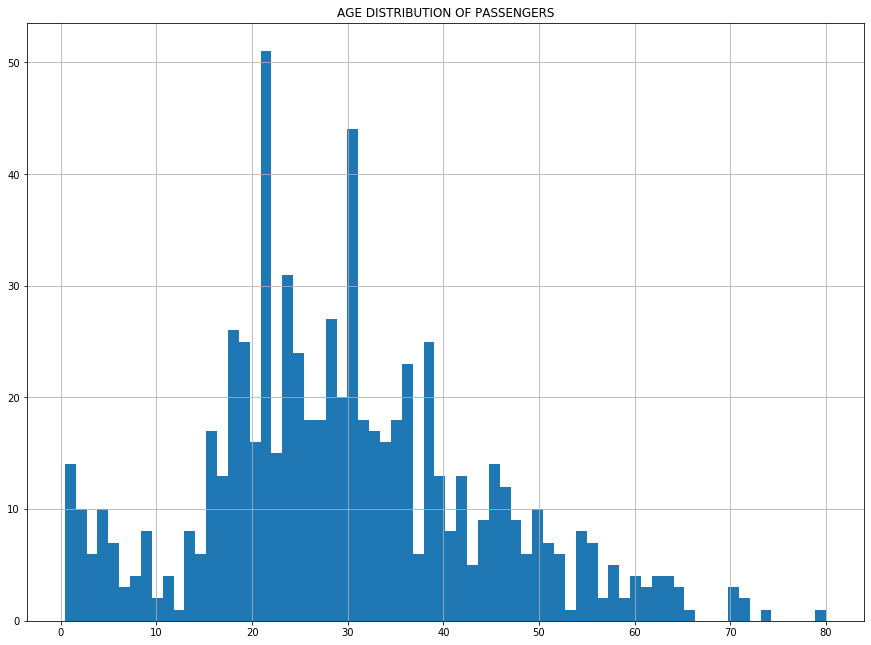

In [8]:
# Explore data for passengers age distribution  
plt.figure(figsize = (15,11))
train_df.Age.hist(bins = 70)
plt.title('AGE DISTRIBUTION OF PASSENGERS')
plt.show() 

Comments: 
Base on our histogram, we noticed that our graph is not normally distributed, it is right skewed. From my expertise, imputing the missing values by the mean may lead to the wrong and biais result by filling the age that is older than the expected or desired according to PClass. To deal with this, it will be wise to use the median instead. 

In [9]:
train_df.groupby(['Pclass']).mean() 

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


Base on the result shown above, it's worth noting that the average age differs within passenger class (Pclass). 
For instanxe, different Pclass had diffirent mean, such as class 1 the average age is 38 years old, for Pclass 2 the average class is 39.88 ~ 40 years old and for Pclass 3 the average is 25 years old. In sum, it is obvious and definitively wise to use the median for imputing the missing values. 

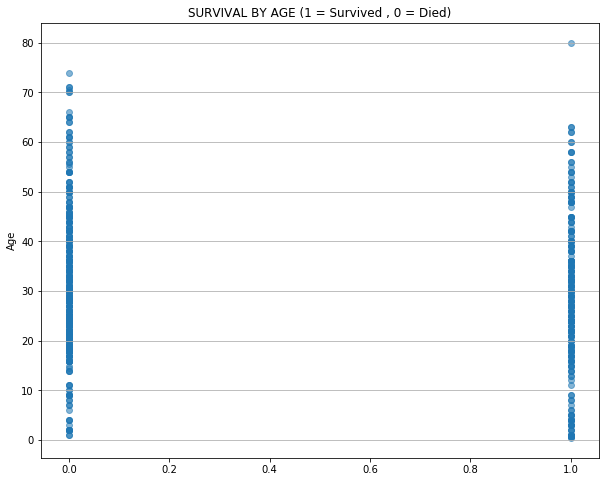

In [10]:
# Explore data for passengers survival by age

plt.figure(figsize = (10,8))
plt.scatter(train_df.Survived, train_df.Age, alpha = 0.55)
# Set y label
plt.ylabel('Age')
# Format grid style for our graph
plt.grid(b = True, which = 'major', axis = 'y')
plt.title( 'SURVIVAL BY AGE (1 = Survived , 0 = Died)')
plt.show()

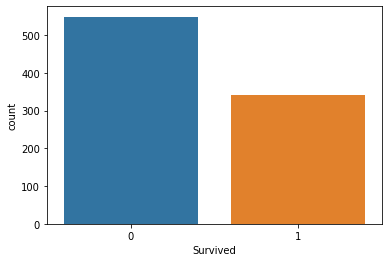

In [11]:
# Explore data for passengers survival breakdown
sbn.countplot(train_df.Survived)

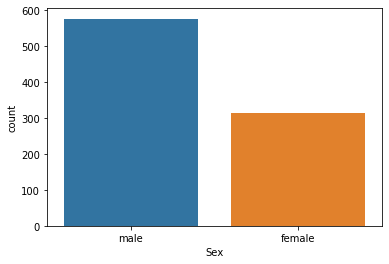

In [12]:
#Explore data for passengers Sex distribution
sbn.countplot(train_df.Sex)

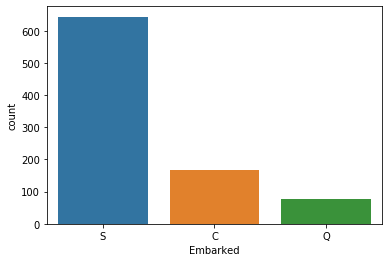

In [13]:
#Explore data for passengers Embarkment
sbn.countplot(train_df.Embarked)


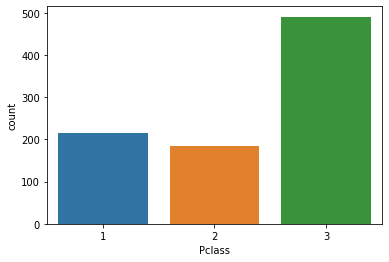

In [14]:
# Explore data for passenger class distribution
sbn.countplot(train_df.Pclass)



In [15]:
# Checking the proportion of all categorical attributes 

print(train_df.Survived.value_counts()) # Survive is our target variable
print('\n')
print(train_df.Sex.value_counts())
print('\n')
print(train_df.Embarked.value_counts())
print('\n')
print(train_df.Pclass.value_counts())

0    549
1    342
Name: Survived, dtype: int64


male      577
female    314
Name: Sex, dtype: int64


S    644
C    168
Q     77
Name: Embarked, dtype: int64


3    491
1    216
2    184
Name: Pclass, dtype: int64


Comments:
Survived:
. 549 pessengers did not survive (62% of passengers died), whereas a total of 342 pessengers survived (38% of passengers survived)
Sex:
. 577 passengers were mal (65% male), while 314 passengers were female (35% female)
Embarked:
. 644 passengers from Southampton embarked the Titanic ( 72% from Southampton)
. 168 passengers from Queenstown embarked the Titanic (19% from Queenstown)
. 77 passengers from Cherbourg embarked the Titanic (9% from Cherbourg)
Pclass:
. 216 passengers boarded on the first Class (24% passengers were in the 1st class )
. 184 passengers boarded on the second Class (21% passengers were in the 2nd class)
. 491 passengers boarded the third Class (55% passengers were in the 3rd class) 

MACHINE LEARNING 

DATA CLEANING AND DATA WRANGLING :
For custom cleanup operations and/or combining specific attributes we are going to use the TransformMixin and BaseEstimator as a base class.

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

Build pipelines to select specifics variables from dataframe in order to handle missing values

In [17]:
# Handling missing values on numerical variable
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
num_pipeline = Pipeline([
        ('select_numeric', DataFrameSelector(['Age', 'SibSp', 'Parch', 'Fare'])),
        ('imputer', SimpleImputer(strategy='median')),
    ])

In [18]:
num_pipeline.fit_transform(train_df) 

array([[22.    ,  1.    ,  0.    ,  7.25  ],
       [38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [28.    ,  1.    ,  2.    , 23.45  ],
       [26.    ,  0.    ,  0.    , 30.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ]])

The regulator SimpleImputer we used for numerical inputs does not work for string categorical inputs Let's use BseEstimator and TransformerMixin instead.

In [19]:
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

Let's build the pipeline for categorical variables and create one binary attribute per category (one-hot encoding). Only one attribute will be equal to 1(hot), while the other will be 0(cold). OneHotEncoder class converts categorical inputs including text categorical inputs into one-hot vectors 

In [20]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
        ('select_cat', DataFrameSelector(['Pclass', 'Sex', 'Embarked'])),
        ('imputer', MostFrequentImputer()),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [21]:

cat_pipeline.fit_transform(train_df)

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

Let us combine the numeric pipeline (num_pipeline) with the categorical pipeline (cat_pipeline)

In [22]:
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ('num_pipeline', num_pipeline),
        ('cat_pipeline', cat_pipeline),
    ])

Building ML Model by splitting train dataset (train_df) into explainatory variable (Xtrain) and response variable or target (ytrain)

In [23]:
Xtrain = preprocess_pipeline.fit_transform(train_df) 
Xtest =  preprocess_pipeline.transform(test_df)
ytrain = train_df.Survived 

In [24]:
print('Xtrain:', Xtrain)

print('Xtest:', Xtest) 

Xtrain: [[22.  1.  0. ...  0.  0.  1.]
 [38.  1.  0. ...  1.  0.  0.]
 [26.  0.  0. ...  0.  0.  1.]
 ...
 [28.  1.  2. ...  0.  0.  1.]
 [26.  0.  0. ...  1.  0.  0.]
 [32.  0.  0. ...  0.  1.  0.]]
Xtest: [[34.5  0.   0.  ...  0.   1.   0. ]
 [47.   1.   0.  ...  0.   0.   1. ]
 [62.   0.   0.  ...  0.   1.   0. ]
 ...
 [38.5  0.   0.  ...  0.   0.   1. ]
 [28.   0.   0.  ...  0.   0.   1. ]
 [28.   1.   1.  ...  1.   0.   0. ]]


In [25]:
# Correlation

corr_matrix = train_df.corr()
corr_matrix['Survived'].sort_values(ascending = False)  


Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

Let us visualize the correlation within attributes to better understand how attributes are correlated each other

C:\Users\mmad\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\mmad\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


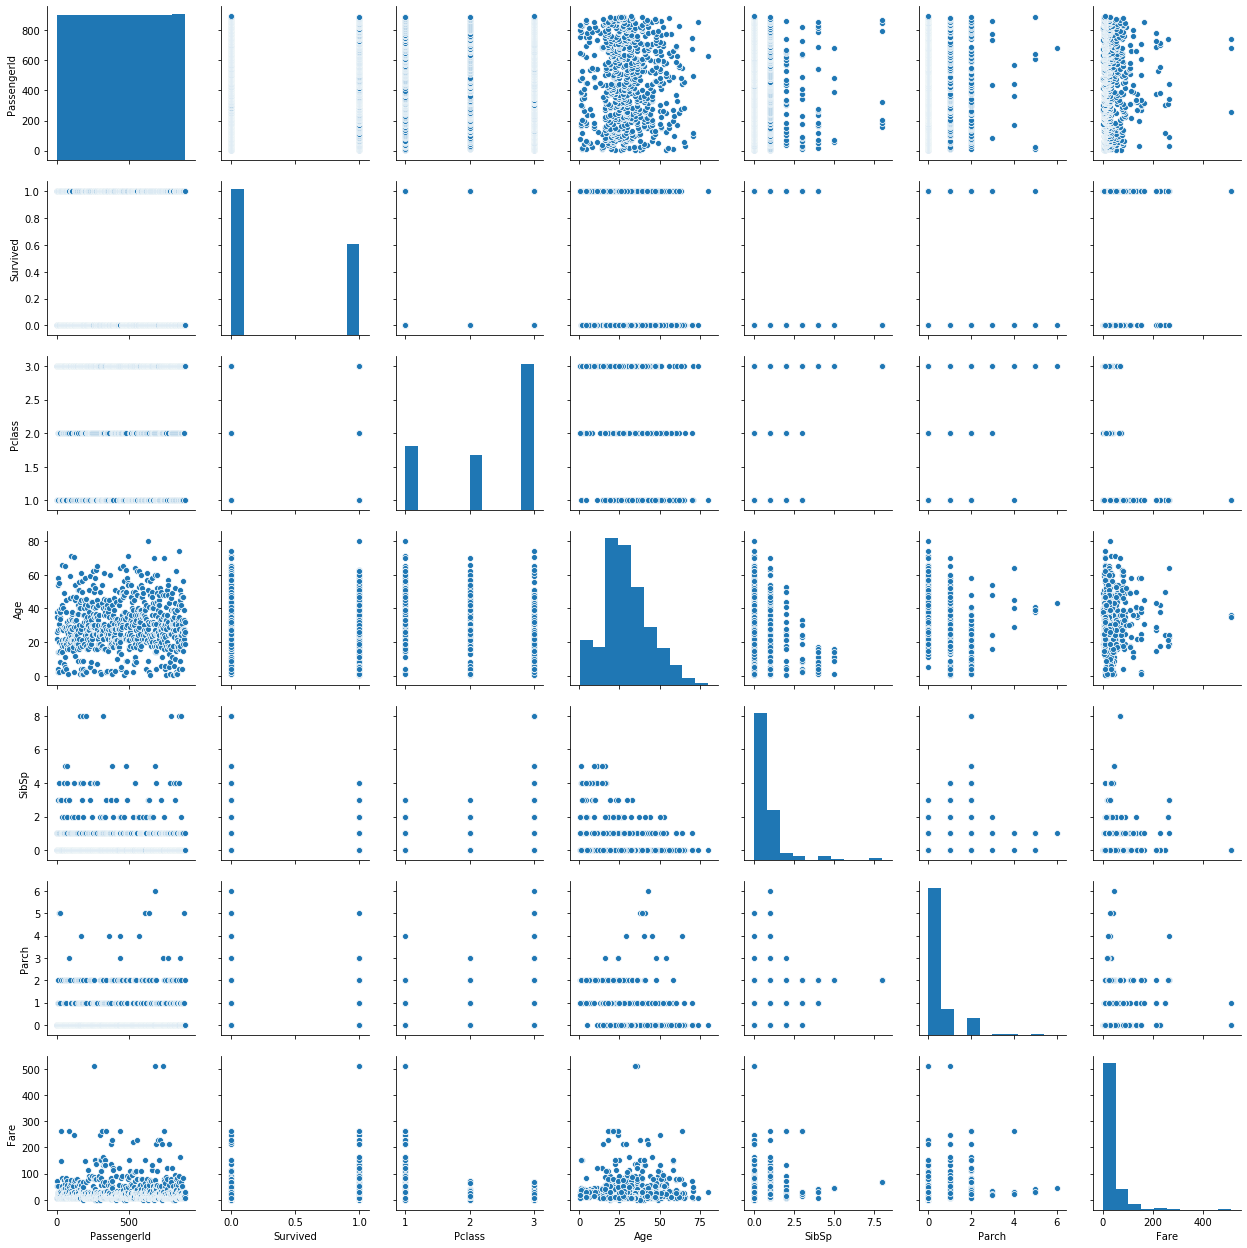

In [26]:

sbn.pairplot(train_df)

Let us check trends and patterns form visualization with values to better get insights from it.

In [27]:
train_df.corr() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


MODEL EVALUATION 

Let's use Support Vector Machine (SVM) classifier, RandomForest classifer, Gradien Descent Classifier and KNN and compare the champion method. The model that will predict with higher accuracy

In [28]:
from sklearn.svm import SVC

svm_clf = SVC(gamma = 'auto')
svm_clf.fit(Xtrain, ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [29]:
from sklearn.model_selection import cross_val_score

svm_scores = cross_val_score(svm_clf, Xtrain, ytrain, cv=10) 
svm_scores

array([0.66666667, 0.65555556, 0.71910112, 0.75280899, 0.75280899,
       0.73033708, 0.76404494, 0.74157303, 0.75280899, 0.82954545])

In [30]:
y_pred = svm_clf.predict(Xtest) 

In [31]:

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_scores = cross_val_score(rf_clf, Xtrain, ytrain, cv=10)
rf_scores

array([0.74444444, 0.8       , 0.76404494, 0.82022472, 0.88764045,
       0.83146067, 0.83146067, 0.7752809 , 0.84269663, 0.85227273])

In [32]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(Xtrain, ytrain)
sgd_scores = cross_val_score(sgd_clf, Xtrain, ytrain, cv = 10) 
sgd_scores

array([0.63333333, 0.64444444, 0.75280899, 0.6741573 , 0.61797753,
       0.61797753, 0.66292135, 0.71910112, 0.75280899, 0.69318182])

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_jobs = -1, weights = 'distance', n_neighbors = 9)

knn_clf.fit(Xtrain, ytrain)
knn_scores = cross_val_score(knn_clf, Xtrain, ytrain, cv = 10)
knn_scores 

array([0.68888889, 0.66666667, 0.73033708, 0.76404494, 0.76404494,
       0.74157303, 0.7752809 , 0.65168539, 0.71910112, 0.80681818])

In [34]:
knn_scores.mean() 

0.7308441153104075

Let us Fine-Tune KNeighbors model to find the great combination of hyperparameter values using cross validation optimize the accuracy of the model

In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights':['uniform', 'distance'], 'n_neighbors':[4,7,15]}]
knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv = 10, verbose = 3, n_jobs = -1)
grid_search.fit(Xtrain, ytrain)


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\mmad\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid=[{'n_neighbors': [4, 7, 15],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [36]:
best_hyp_parameter = grid_search.best_params_ 
print('best_parameter:',best_hyp_parameter)

best_parameter: {'n_neighbors': 15, 'weights': 'distance'}


In [37]:
best_score = grid_search.best_score_ 
print('Accuracy:',best_score)

Accuracy: 0.7362514029180696


The second K-Nearest-Neighbors with hyperparameters outperfroms the first one and improve the accuracy.

In [38]:
print('rf_scores:',  rf_scores.mean())
print('svm_scores:',svm_scores.mean())
print('knn_scores:',best_score)
print('sgd_scores:',sgd_scores.mean())

rf_scores: 0.8149526160481217
svm_scores: 0.7365250822835092
knn_scores: 0.7362514029180696
sgd_scores: 0.676871240494836


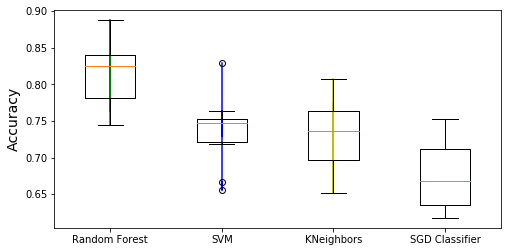

In [39]:
plt.figure(figsize=(8, 4))
plt.plot([1]*10, rf_scores, "g")
plt.plot([2]*10, svm_scores, "b")
plt.plot([3]*10, knn_scores, "y")
plt.plot([4]*10, sgd_scores, " r")
plt.boxplot([ rf_scores, svm_scores, knn_scores,sgd_scores ], labels=('Random Forest','SVM','KNeighbors',  'SGD Classifier'))
plt.ylabel("Accuracy", fontsize=14)
plt.show() 

Create an Age bucket column within a decade

In [48]:

train_df.groupby(['Pclass'])['AgeBucket'].mean() 

,Age,AgeBucket,RelativesOnboard,Survived
Pclass,,,,
1,38.233441,33.655914,0.773148,0.629630
2,29.877630,25.433526,0.782609,0.472826
3,25.140620,20.760563,1.008147,0.242363
